# PA005: High Values Customer Identification ( Insiders )

# 0.0. Planejamento da Solução ( IOT )

### Input - Entrada

1. Problema de Negócio
 - Selecionar os clientes mais valiosos para integrar um programa de Fidelização
2. Conjunto de Dados
 - Vendas de um e-commerce online, durante o periodo de um ano.

### Ouput - Saída

1. A indicação de pessoas para fazer parte do programa de fidelidade "INSIDERS".
    - Lista: client_id | is_insider |
               10235 | yes/1
               25482 | no/0

2. Relatório com as respostas para as seguintes perguntas:
    - Quem são as pessoas elegíveis para participar do programa de Insiders ?
    - Quantos clientes farão parte do grupo?Quais as principais características desses clientes ?
    - Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
    - Qual a expectativa de faturamento desse grupo para os próximos meses ?
    - Quais as condições para uma pessoa ser elegível ao Insiders ?
    - Quais as condições para uma pessoa ser removida do Insiders ?
    - Qual a garantia que o programa Insiders é melhor que o restante da base ?
    - Quais ações o time de marketing pode realizar para aumentar o faturamento?

### Task - Tarefas

1. Quem são as pessoas elegíveis para participar do programa de Insiders ?
    - O que é ser elegível ? O que é um cliente "valioso" para a empresa ?
    - Faturamento:
        - Alto Ticket Médio ( média de gastos )
        - Alto LTV ( total de gasto )
        - Baixa Recência ou Alta Frequência ( tempo entre as compras )
        - Alto Basket Size ( quantidade média de produtos comprados )
        - Baixa probabilidade de Churn
        - Previsão alta de LTV
        - Alta propensão de compra

    - Custo:
        - Baixo número de devoluções
        
    - Experiência:  
        - Média alta de avaliações

2. Quantos clientes farão parte do grupo?
    - Número de clientes
    - % em relação ao total de clients

3. Quais as principais características desses clientes ?
    - Escrever os principais atributos dos clientes
        - Idade
        - País
        - Salário
        
    Escrever os principais comportamentos de compra dos clients ( métricas de negócio ) Vide acima

4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
    - Calcular o faturamento total da empresa durante o ano.
    - Calcular o faturamento (%) apenas do cluster Insiders.
    

5. Qual a expectativa de faturamento desse grupo para os próximos meses ?
    - Cálculo do LTV do grupo InsidersSéries Temporais ( ARMA, ARIMA, HoltWinter, etc )
    

6. Quais as condições para uma pessoa ser elegível ao Insiders ?
    - Qual o período de avaliação ?
    - O "desempenho" do cliente está próximo da média do cluster Insiders. 
    

7. Quais as condições para uma pessoa ser removida do Insiders ?
    - O "desempenho" do cliente não está mais próximo da média do cluster Insiders. 
    

8. Qual a garantia que o programa Insiders é melhor que o restante da base ?
    - Teste de Hipóteses
    - Teste A/B
    

9. Quais ações o time de marketing pode realizar para aumentar o faturamento?
    - Descontos
    - Preferências de escolha
    - Produtos exclusivos

# Ciclo 0.1. Métricas de Validação de Cluster

1. Feature Engineering
    - Recência
    - Frequência
    - Monetizaçã0   
2. Métricas de validação de Clustering
    - WSS ( Within-Cluster Sum of Square ) 
    - SS ( Silhouette Score )    
3. Cluster Analysis
    - Plot 3D
    - Cluster Profile

# Ciclo 0.2. Análise de Silhouette

1. Feature Engineering
    - Average Ticket    
2. Análise de Silhouette
    - Silhouette Analysis    
3. Cluster Visualization
    - UMAP   
4. Cluster Análise de Perfil
    - Descrição dos centróides dos cluster

# Ciclo 0.3. Statistical Descriptive

1. Análise Descritiva
    - Atributos numéricos
    - Atibutos categóricos
2. Feature Engineering
    - Average Recency
    - Number of Returns
3. Data preparation
    - stander Scaler

# 0.0 Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import umap.umap_ as umap

from plotly import express as px

from sklearn import cluster as c
from sklearn import metrics as m
from sklearn import preprocessing as pp

from IPython.display     import HTML
from matplotlib          import pyplot as plt

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer 

/opt/anaconda/envs/pa005_insiders_clustering/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 0.1. Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'ggplot' )
    plt.rcParams['figure.figsize'] = [24, 9]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()    


jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 0.2. Load dataset

In [3]:
# load data
df_raw = pd.read_csv( '../data/raw/Ecommerce.csv', encoding='unicode_escape')

# drop extra column
df_raw = df_raw.drop( columns=['Unnamed: 8'], axis=1 )

# <font color='red'> 1.0. Descrição dos dados </font>

In [4]:
df1 = df_raw.copy()

## 1.1. Rename Columns

In [5]:
cols_new = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'customer_id', 'country']
df1.columns = cols_new

## 1.2. Data Dimensions

In [6]:
print( f'Number of rows: {df1.shape[0]}')
print( f'Number of cols: {df1.shape[1]}')

Number of rows: 541909
Number of cols: 8


## 1.3. Data Types

In [7]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 1.4. Check NA

In [8]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.5. Replace NA

In [9]:
df1 = df1.dropna( subset=['description', 'customer_id'] )
print( f'Removed data: {1-(df1.shape[0] / df_raw.shape[0] ) :.2f}')

Removed data: 0.25


In [10]:
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## 1.6. Change Dtypes

In [11]:
# invoice date
df1['invoice_date'] = pd.to_datetime( df1['invoice_date'], format='%d-%b-%y' )

# customer id
df1['customer_id'] = df1['customer_id'].astype( int )
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [12]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

## 1.7. Descriptive Statistics

In [13]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'])
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'])

### 1.7.1 Numerical Attributs

In [14]:
# central tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - desvio padrão, minimo, maximo, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( np.min ) ).T
d3 = pd.DataFrame( num_attributes.apply( np.max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'mediana', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,mediana,std,skew,kurtosis
0,quantity,-80995.0,80995.0,161990.0,12.061303,5.00,248.693064,0.182663,94317.563673
1,unit_price,0.0,38970.0,38970.0,3.460471,1.95,69.315077,452.219019,246924.542988
2,customer_id,12346.0,18287.0,5941.0,15287.690570,15152.00,1713.598197,0.029835,-1.179982


### <font color='red' > 1.7.1.1 Numerical Attributs - Investigating </font>

1. Quantity negativa ( pode ser devolução )

2. Preço unitário igual a zero (  pode ser promoção )

### 1.7.2 Categorical Attributs

### invoice NO

In [15]:
# invoice number
# problema: invoice com letras e numeros

df_letter_invoices = df1.loc[ df1['invoice_no'].apply( lambda x: bool( re.search( '[^0-9]+', x ) ) ), : ]
df_letter_invoices.head()

print( f'Total de number of invoices: { len( df_letter_invoices )}')

print(f'Total de number of negative quantity: {len( df_letter_invoices[ df_letter_invoices["quantity"] < 0])}')

Total de number of invoices: 8905
Total de number of negative quantity: 8905


### stock code

In [16]:
# check stock codes only characters
df1.loc[ df1['stock_code'].apply( lambda x: bool( re.search( '^[a-zA-Z]+', x ) ) ),'stock_code'].unique()

# Ação:
## 1. Remover stock_code in ['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK']

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK'],
      dtype=object)

### Description

In [17]:
# Delete description

df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


### Country

In [18]:
df1['country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [19]:
len(df1['country'].unique())

37

In [25]:
df1['country'].value_counts( normalize=True ).head()

United Kingdom    0.889509
Germany           0.023339
France            0.020871
EIRE              0.018398
Spain             0.006226
Name: country, dtype: float64

In [27]:
df1[['customer_id', 'country']].drop_duplicates().groupby( 'country').count().reset_index().sort_values( 'customer_id', ascending=False).head()

,country,customer_id
35,United Kingdom,3950
14,Germany,95
13,France,87
30,Spain,31
3,Belgium,25


# <font color='red'> 2.0. Filtragem de Variavéis </font>

In [125]:
df2 = df1.copy()

In [126]:
df2.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [127]:
# === Numerical attributes ===
df2 = df2.loc[df2['unit_price'] >= 0.04, :]

# === Categorical attributes ===
df2 = df2[~df2['stock_code'].isin( ['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK'] )]

# description
df2 = df2.drop( columns='description', axis=1 )

# map
df2['country'].isin( ['Unspecified', 'European Community'])


# quantity - Rivisão entre compra e decolução
df2_returns = df2.loc[df2['quantity'] < 0, :]
df2_purchases = df2.loc[df2['quantity'] >= 0, :]

# <font color='red'> 3.0. Feature Engineering </font>

In [128]:
df3 = df2.copy()

## 3.1. Feature Creation

In [129]:
# data reference
df_ref = df3.drop( ['invoice_no', 'stock_code', 
                    'quantity', 'invoice_date', 'unit_price', 
                    'country'], axis=1 ).drop_duplicates( ignore_index=True )
df_ref.head()

,customer_id
0,17850
1,13047
2,12583
3,13748
4,15100


In [130]:
# Gross Revenue ( Faturamento ) quantity * price
df2_purchases.loc[:, 'gross_revenue'] = df2_purchases.loc[:, 'quantity'] * df2_purchases.loc[:, 'unit_price']

# Monetary
df_monetary = df2_purchases.loc[:,[ 'customer_id', 'gross_revenue']].groupby( 'customer_id' ).sum().reset_index()
df_ref = pd.merge( df_ref, df_monetary, on='customer_id', how='left')
df_ref.isna().sum() # -> Check NA apos merge

/tmp/ipykernel_11138/1014104967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_purchases.loc[:, 'gross_revenue'] = df2_purchases.loc[:, 'quantity'] * df2_purchases.loc[:, 'unit_price']


customer_id       0
gross_revenue    28
dtype: int64

In [131]:
# Recency - Last day purchase
df_recency = df2_purchases.loc[:, ['customer_id', 'invoice_date']].groupby( 'customer_id' ).max().reset_index()

df_recency['recency_days'] = ( df2['invoice_date'].max() - df_recency['invoice_date'] ).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left')
df_ref.isna().sum() # -> Check NA apos merge

customer_id       0
gross_revenue    28
recency_days     28
dtype: int64

In [132]:
# Frequency
df_freq = df2_purchases.loc[:,['customer_id', 'invoice_no']].drop_duplicates().groupby( 'customer_id' ).count().reset_index()
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left')
df_ref.isna().sum() # -> Check NA apos merge

customer_id       0
gross_revenue    28
recency_days     28
invoice_no       28
dtype: int64

In [133]:
# ====== ciclo 2 ======
df_avg_ticket = df2_purchases.loc[:,['customer_id', 'gross_revenue']].groupby( 'customer_id' ).mean().reset_index().rename( columns={'gross_revenue':'avg_ticket'} )
df_ref = pd.merge( df_ref, df_avg_ticket, on='customer_id', how='left')

df_ref.isna().sum() # -> Check NA apos merge

customer_id       0
gross_revenue    28
recency_days     28
invoice_no       28
avg_ticket       28
dtype: int64

In [134]:
df_ref.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket
0,17850,5391.21,372.0,34.0,18.152222
1,13047,3232.59,56.0,9.0,18.904035
2,12583,6705.38,2.0,15.0,28.902500
3,13748,948.25,95.0,5.0,33.866071
4,15100,876.00,333.0,3.0,292.000000


# <font color='red'> 4.0. EDA (Exploratory Data Analysis) </font>

In [135]:
df4 = df_ref.dropna()
df4.isna().sum()

customer_id      0
gross_revenue    0
recency_days     0
invoice_no       0
avg_ticket       0
dtype: int64

# <font color='red'> 5.0. Data Preparation </font>

In [172]:
df5 = df4.copy()

In [174]:
# Standard Scaler
ss = pp.StandardScaler()

df5['gross_revenue'] = ss.fit_transform( df5[['gross_revenue']])
df5['recency_days'] = ss.fit_transform( df5[['recency_days']])
df5['invoice_no'] = ss.fit_transform( df5[['invoice_no']])
df5['avg_ticket'] = ss.fit_transform( df5[['avg_ticket']])

# <font color='red'> 6.0. Feature Selection </font>

In [178]:
df6 = df5.copy()

# <font color='red'> 7.0. Hyperparameter Fine-Tunning </font>

In [179]:
X = df6.drop( columns=['customer_id'])

In [180]:
clusters = [ 2, 3, 4, 5, 6, 7]

## 7.1. Within-Cluster Sum of Square ( WSS )                                    

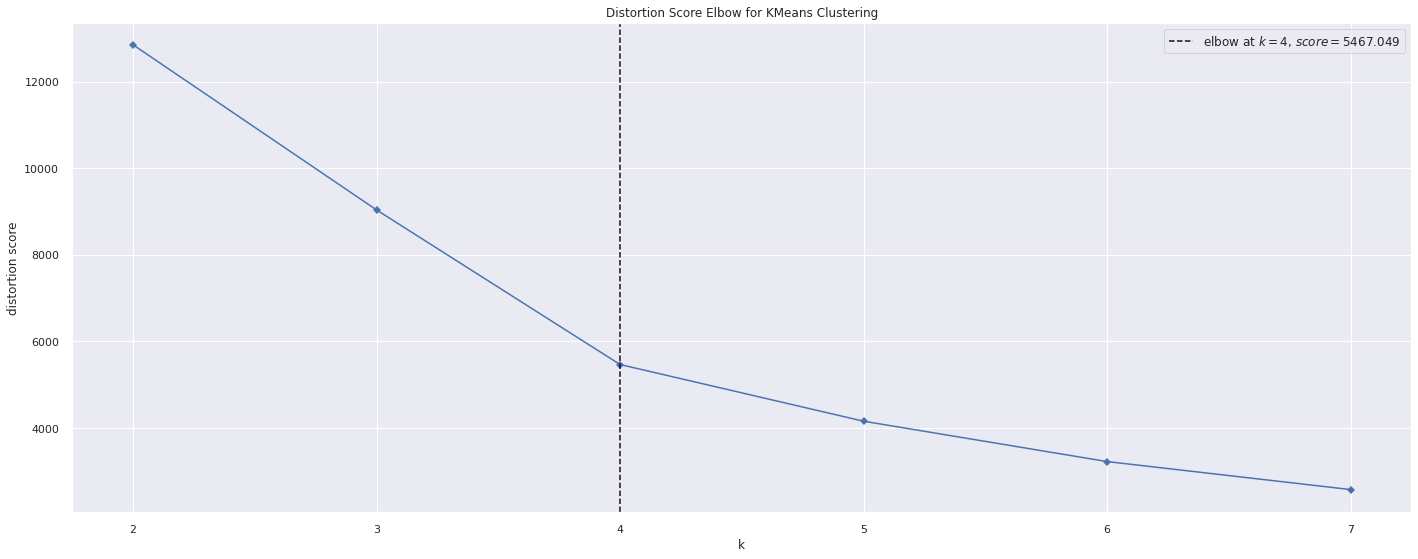

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [181]:
kmeans = KElbowVisualizer( c.KMeans(), k=clusters, timings=False )
kmeans.fit( X )
kmeans.show()

## 7.2. Sillhouette Score

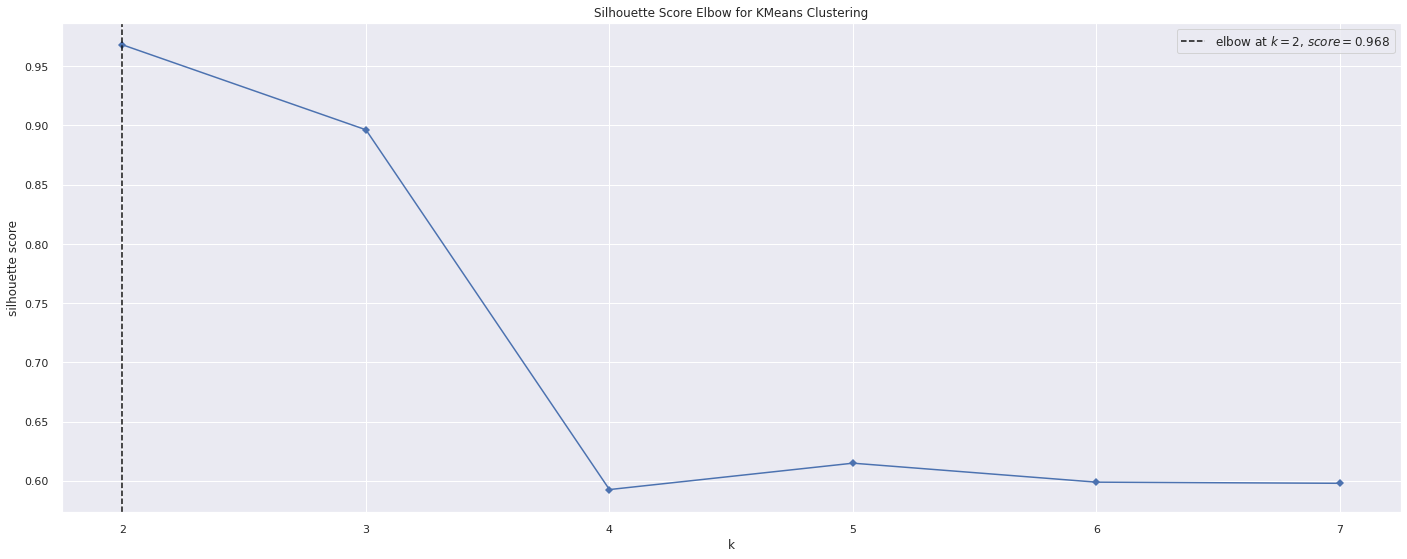

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [182]:
kmeans = KElbowVisualizer( c.KMeans(), k=clusters, metric='silhouette', timings=False )
kmeans.fit( X )
kmeans.show()

## 7.3. Silhouette Analysis

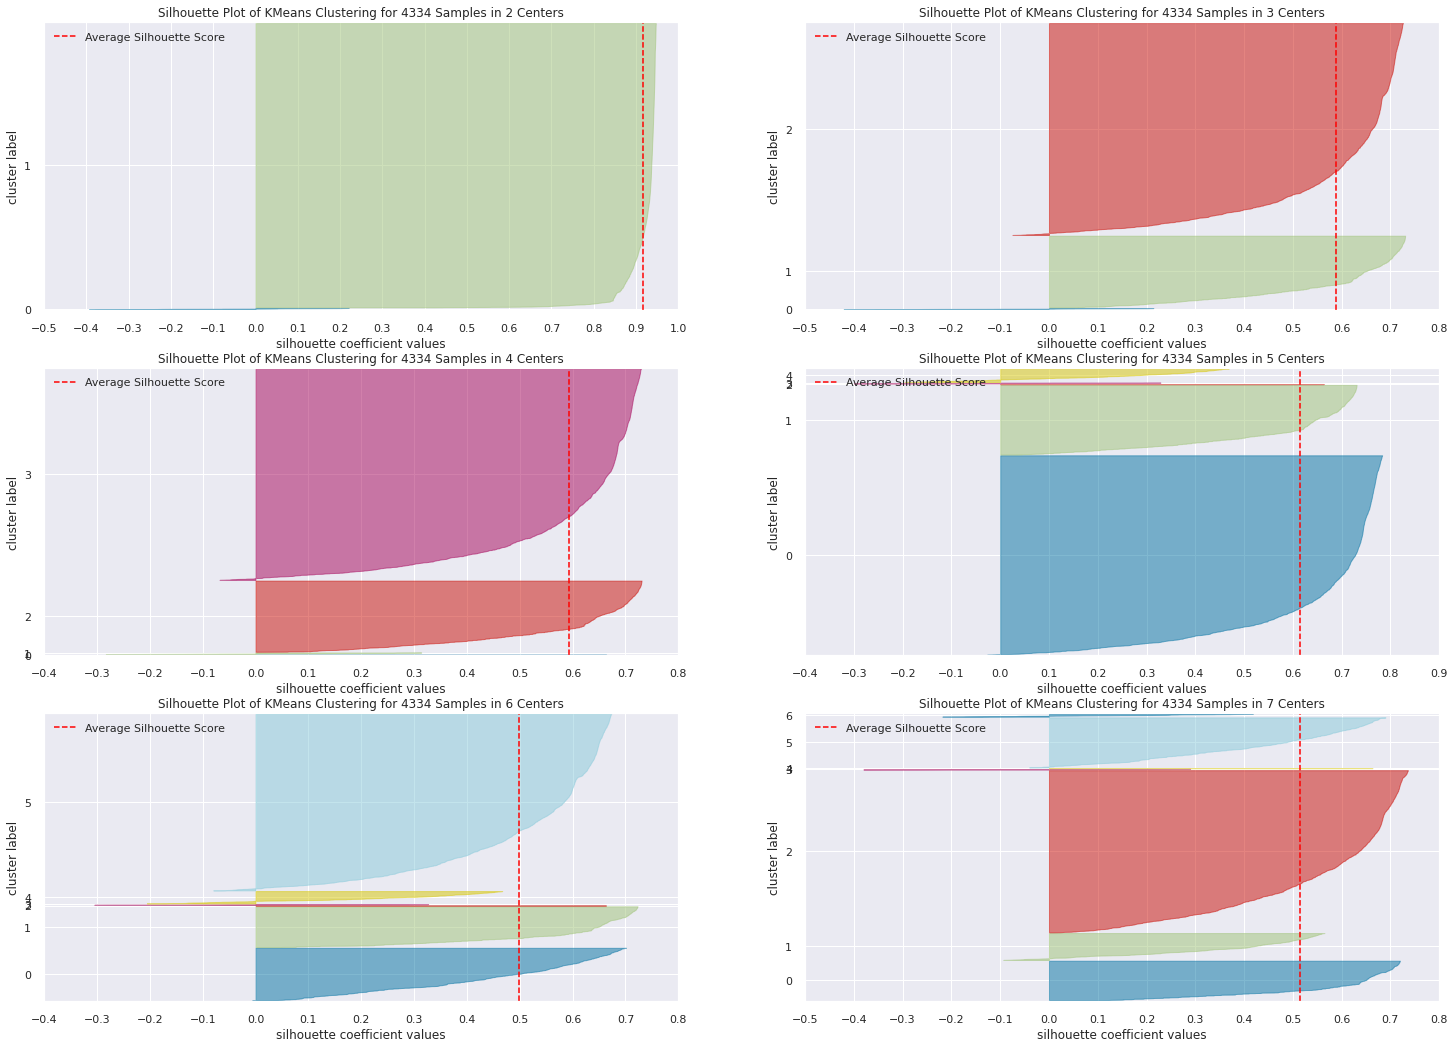

In [183]:
fig, ax = plt.subplots( 3, 2, figsize=(25, 18) )

for k in clusters:
    km = c.KMeans( n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42 )
    q, mod = divmod( k, 2 )
    
    visualizer = SilhouetteVisualizer( km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit( X )
    visualizer.finalize()

# <font color='red'> 8.0. Model Training </font>

## 8.1. K-Means

In [184]:
# model definition
k = 3 
kmeans = c.KMeans( init='random', n_clusters=k, n_init=10, max_iter=300 )

# model training
kmeans.fit( X )

# clustering
labels = kmeans.labels_

## 8.1. Clusters Validation

In [185]:
# WSS ( Within-cluter sum of square )
print( f'WSS Value: { kmeans.inertia_}')

# SS ( Silhouette Score )
print( f'SS Value: { m.silhouette_score( X, labels, metric="euclidean")}')

WSS Value: 9420.062067546805
SS Value: 0.588752375906376


# <font color='red'> 9.0. Cluster Analysis </font>

In [186]:
df9 = df6.copy()
df9['cluster'] = labels
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,cluster
0,17850,0.378347,2.793160,3.897513,-0.033914,2
1,13047,0.135982,-0.361673,0.622737,-0.033402,0
2,12583,0.525899,-0.900791,1.408683,-0.026594,0
3,13748,-0.120499,0.027689,0.098772,-0.023214,0
4,15100,-0.128611,2.403798,-0.163210,0.152554,2


## 9.1. Visualization Inspection

/opt/anaconda/envs/pa005_insiders_clustering/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


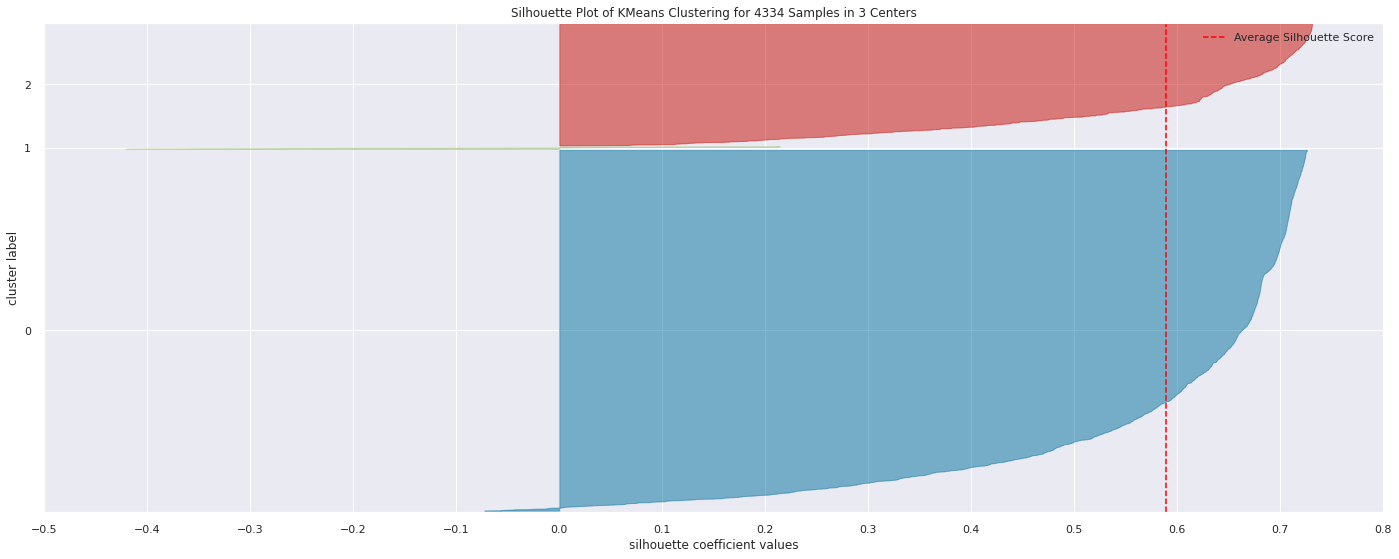

In [187]:
visualizer = SilhouetteVisualizer( kmeans, colors='yellowbrick')
visualizer.fit( X )
visualizer.finalize()

## 9.2. 2d plot

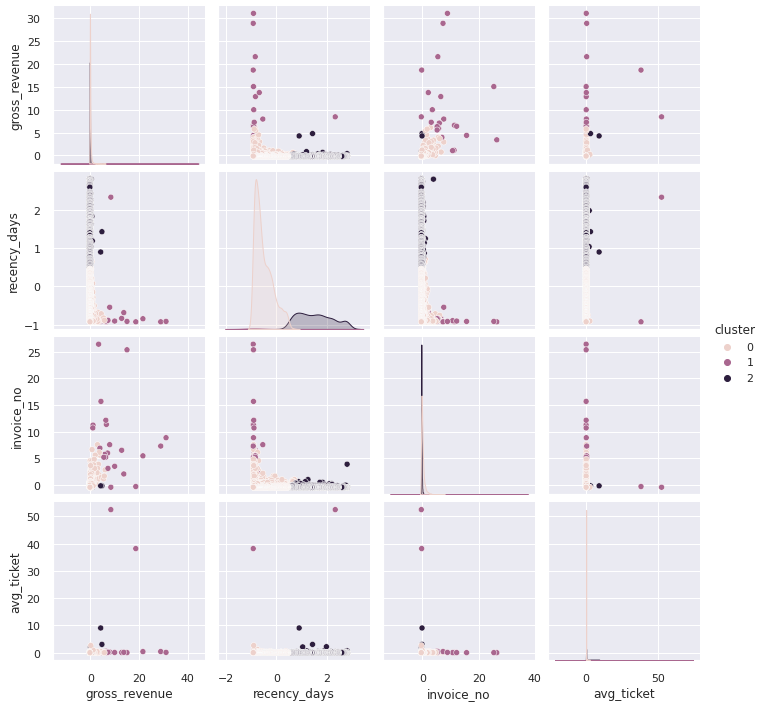

In [188]:
df_viz = df9.drop( columns='customer_id', axis=1 )
sns.pairplot( df_viz, hue='cluster')

## 9.3. UMAP

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

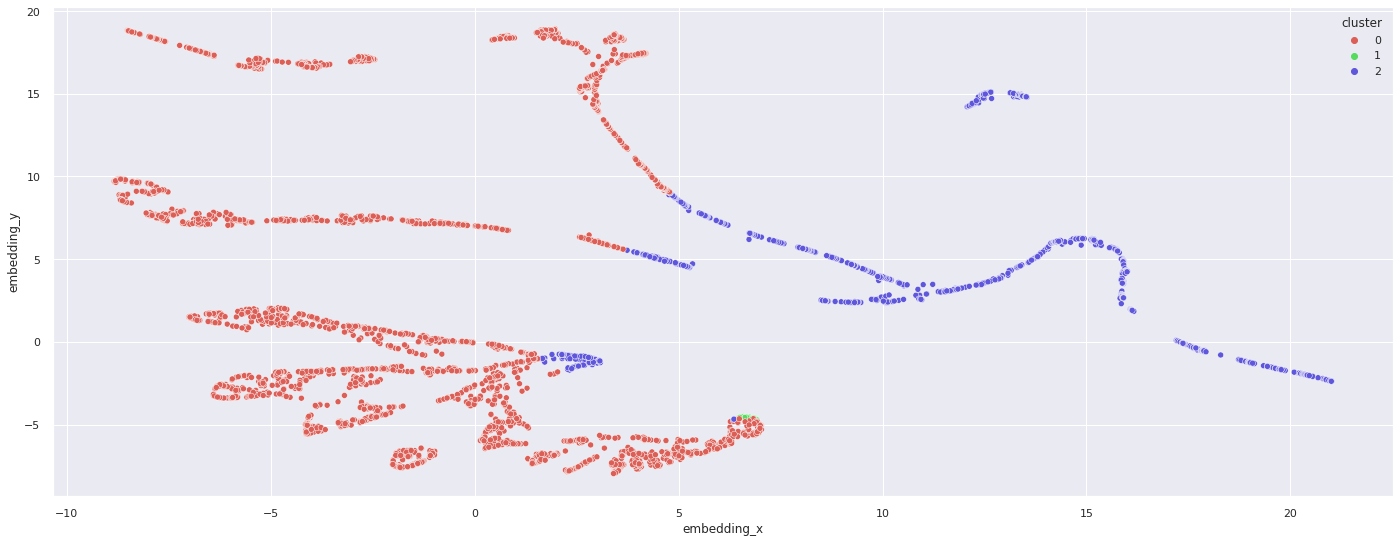

In [189]:
reducer = umap.UMAP( n_neighbors=20, random_state=42 )
embedding = reducer.fit_transform( X )

# embedding
df_viz['embedding_x'] = embedding[:, 0]
df_viz['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot( x='embedding_x', y='embedding_y',
               hue='cluster',
               palette=sns.color_palette( 'hls', n_colors=len( df_viz['cluster'].unique() ) ),
               data=df_viz )

## 9.1. Cluster Profile

In [190]:
# Number of customer
df_cluster = df9[['customer_id', 'cluster']].groupby( 'cluster' ).count().reset_index()
df_cluster['perc_customer'] = 100*( df_cluster['customer_id'] / df_cluster['customer_id'].sum() )

# Avg Gross revenue
df_avg_gross_revenue = df9[['gross_revenue', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_gross_revenue, how='inner', on='cluster')

# Avg recency days
df_avg_recency_days = df9[['recency_days', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_recency_days, how='inner', on='cluster')

# Avg invoice_no
df_avg_invoice_no = df9[['invoice_no', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_invoice_no, how='inner', on='cluster')

#Avg Ticket
df_ticket = df9[['avg_ticket', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_ticket, how='inner', on='cluster')

df_cluster

,cluster,customer_id,perc_customer,gross_revenue,recency_days,invoice_no,avg_ticket
0,0,3225,74.411629,-0.015019,-0.513580,0.060511,-0.02567
1,1,22,0.507614,10.334967,-0.723354,8.440522,4.19143
2,2,1087,25.080757,-0.164611,1.538370,-0.350357,-0.00867


### Cluster 00:  
- Número de customers: 4071 (93% do customers )
- Recência em média: 96 dias
- Compras em média: 4 compras
- Receita em média: 946,00 dólares
- Ticket médio: 25,00 dólares

### Cluster 01: 
- Número de customers: 6 (0.14% do customers )
- Recência em média: 7 dias
- Compras em média: 89 compras
- Receita em média: 182.182,00 dólares
- Ticket médio: 254,00 dólares

### Cluster 02:
- Número de customers: 28 (0.64 do customers )
- Recência em média: 6 dias
- Compras em média: 57 compras
- Receita em média: 42.614,38 dólares
- Ticket médio: 163,00 dólares

### Cluster 03:
- Número de customers: 267 (6% do customers )
- Recência em média: 20 dias
- Compras em média: 19 compras
- Receita em média: 8.089,02 dólares
- Ticket médio: $63,00 dólares


# <font color='red'> 10.0. Deploy To Production </font>